In [ ]:
%%bash

# JVM needs to be re-installed
apt-get update > /dev/null
apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Descargar Hadoop
wget -q https://downloads.apache.org/hadoop/common/hadoop-3.3.5/hadoop-3.3.5.tar.gz
tar -xzf hadoop-3.3.5.tar.gz
mv hadoop-3.3.5/ /usr/local/

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import os

HADOOP_VERSION = "3.3.5"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"   # default is changed
os.environ["HADOOP_HOME"] = f"/usr/local/hadoop-{HADOOP_VERSION}/"

# Agrega el Hadoop BIN al PATH
current_path = os.getenv('PATH')
new_path = current_path + f":/usr/local/hadoop-{HADOOP_VERSION}/bin/"
os.environ["PATH"] = new_path

# Verificar si PATH contiene Hadoop
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/hadoop-3.3.5/bin/


In [ ]:
!hadoop version

Hadoop 3.3.5
Source code repository https://github.com/apache/hadoop.git -r 706d88266abcee09ed78fbaa0ad5f74d818ab0e9
Compiled by stevel on 2023-03-15T15:56Z
Compiled with protoc 3.7.1
From source with checksum 6bbd9afcf4838a0eb12a5f189e9bd7
This command was run using /usr/local/hadoop-3.3.5/share/hadoop/common/hadoop-common-3.3.5.jar


In [ ]:
!mkdir -p /usr/local/hadoop/etc/hadoop/

In [ ]:
!hadoop version

Hadoop 3.3.5
Source code repository https://github.com/apache/hadoop.git -r 706d88266abcee09ed78fbaa0ad5f74d818ab0e9
Compiled by stevel on 2023-03-15T15:56Z
Compiled with protoc 3.7.1
From source with checksum 6bbd9afcf4838a0eb12a5f189e9bd7
This command was run using /usr/local/hadoop-3.3.5/share/hadoop/common/hadoop-common-3.3.5.jar


In [ ]:
!wget -q https://downloads.apache.org/hive/hive-3.1.3/apache-hive-3.1.3-bin.tar.gz
!tar xzf apache-hive-3.1.3-bin.tar.gz

In [ ]:
os.environ["HIVE_HOME"] = "/content/apache-hive-3.1.3-bin"

!echo $HIVE_HOME

/content/apache-hive-3.1.3-bin


In [ ]:
current_path = os.getenv('PATH')
new_path = current_path+':/content/apache-hive-3.1.3-bin/bin'
os.environ["PATH"] = new_path
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/hadoop-3.3.5/bin/:/content/apache-hive-3.1.3-bin/bin


In [ ]:
!echo $JAVA_HOME
!echo $HADOOP_HOME
!echo $HIVE_HOME

/usr/lib/jvm/java-8-openjdk-amd64
/usr/local/hadoop-3.3.5/
/content/apache-hive-3.1.3-bin


In [ ]:
!rm *.tar.gz

In [ ]:
!hdfs dfs -mkdir /tmp
!hdfs dfs -chmod g+w /tmp

!hdfs dfs -mkdir -p /content/warehouse
!hdfs dfs -chmod g+w /content/warehouse

mkdir: `/tmp': File exists


In [ ]:
!ls $HADOOP_HOME/share/hadoop/common/lib/*slf4j*
!ls $HIVE_HOME/lib/*slf4j*

/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jul-to-slf4j-1.7.36.jar
/usr/local/hadoop-3.3.5//share/hadoop/common/lib/slf4j-api-1.7.36.jar
/usr/local/hadoop-3.3.5//share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar
/content/apache-hive-3.1.3-bin/lib/log4j-slf4j-impl-2.17.1.jar


In [ ]:
!mv /content/apache-hive-3.1.3-bin/lib/log4j-slf4j-impl-2.17.1.jar ./

In [ ]:
!ls $HIVE_HOME/lib/gu*

/content/apache-hive-3.1.3-bin/lib/guava-19.0.jar


In [ ]:
!ls $HADOOP_HOME/share/hadoop/hdfs/lib/gu*

/usr/local/hadoop-3.3.5//share/hadoop/hdfs/lib/guava-27.0-jre.jar


In [ ]:
!mv $HIVE_HOME/lib/guava-19.0.jar ./
!cp $HADOOP_HOME/share/hadoop/hdfs/lib/guava-27.0-jre.jar $HIVE_HOME/lib/

### **- Cree en el *HDFS* a la ruta /data/,**

In [ ]:
# Crea un directorio en el sistema de archivos distribuido de Hadoop (HDFS)
# La opción '-p' asegura que se creen todos los directorios padres necesarios
# En este caso, el directorio '/data/' se creará si no existe ya
!hadoop fs -mkdir -p /data/

In [ ]:
!hadoop fs -ls /

Found 29 items
-rwxr-xr-x   1 root root          0 2024-09-15 22:58 /.dockerenv
-rw-r--r--   1 root root      17294 2023-11-10 04:55 /NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   - root root       4096 2024-09-15 23:30 /bin
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /boot
drwxr-xr-x   - root root       4096 2024-09-15 23:57 /content
-rw-r--r--   1 root root       4332 2023-11-10 04:56 /cuda-keyring_1.0-1_all.deb
drwxr-xr-x   - root root       4096 2024-09-15 23:22 /data
drwxr-xr-x   - root root       4096 2024-09-12 13:40 /datalab
drwxr-xr-x   - root root        360 2024-09-15 22:58 /dev
drwxr-xr-x   - root root       4096 2024-09-15 23:30 /etc
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /home
drwxr-xr-x   - root root       4096 2024-09-12 13:18 /lib
drwxr-xr-x   - root root       4096 2024-09-12 13:15 /lib32
drwxr-xr-x   - root root       4096 2024-09-12 13:15 /lib64
drwxr-xr-x   - root root       4096 2023-10-04 02:08 /libx32
drwxr-xr-x   - root root       4096 2023-10-04

Coloque los datos de vuelos correspondientes a Marzo de 2024 en la ruta anterior,

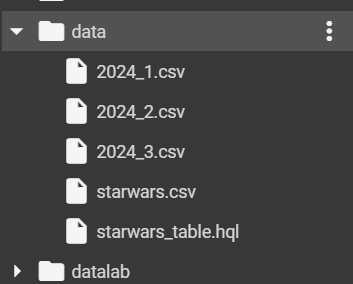

Renombre los datos anteriores en el mismo directorio de hdfs pero con la denominación "2024_3.csv"

In [ ]:
# Renombrar el archivo a 2024_3.csv en HDFS
!hadoop fs -mv /data/flights_march_2024.csv /data/2024_3.csv

mv: `/data/2024_3.csv': File exists


Cuente cuántos bloques se han creado en el hdfs con la generación de “/data/2024_3.csv” y cuanto ocupa cada uno de ellos (Hint: https://hadoop.apache.org/docs/r1.2.1/commands_manual.html#fsck),

In [ ]:
!apt-get update
!apt-get install -y openjdk-8-jdk wget
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.5/hadoop-3.3.5.tar.gz
!tar -xzvf hadoop-3.3.5.tar.gz
!mv hadoop-3.3.5 /usr/local/hadoop
!rm hadoop-3.3.5.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/DeviceMappingManager.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/DeviceResourceHandlerImpl.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/ShellWrapper.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/package-frame.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodem

In [ ]:
!ls /usr/local/hadoop/etc

hadoop


In [ ]:
!mv /usr/local/hadoop/etc /usr/local/hadoop/etc_backup

In [ ]:
!mv /usr/local/hadoop/hadoop-3.3.5/* /usr/local/hadoop/
!rmdir /usr/local/hadoop/hadoop-3.3.5

In [ ]:
!ls /usr/local/hadoop/bin
!ls /usr/local/hadoop/sbin

container-executor  hadoop.cmd	hdfs.cmd  mapred.cmd	test-container-executor  yarn.cmd
hadoop		    hdfs	mapred	  oom-listener	yarn
distribute-exclude.sh	 refresh-namenodes.sh  start-yarn.cmd	 stop-secure-dns.sh
FederationStateStore	 start-all.cmd	       start-yarn.sh	 stop-yarn.cmd
hadoop-daemon.sh	 start-all.sh	       stop-all.cmd	 stop-yarn.sh
hadoop-daemons.sh	 start-balancer.sh     stop-all.sh	 workers.sh
httpfs.sh		 start-dfs.cmd	       stop-balancer.sh  yarn-daemon.sh
kms.sh			 start-dfs.sh	       stop-dfs.cmd	 yarn-daemons.sh
mr-jobhistory-daemon.sh  start-secure-dns.sh   stop-dfs.sh


In [ ]:
!export HADOOP_HOME=/usr/local/hadoop
!export PATH=$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin

In [ ]:
!cd /usr/local/hadoop/sbin && ./start-dfs.sh
!cd /usr/local/hadoop/sbin && ./start-yarn.sh

Starting namenodes on [1911db9cf159]
ERROR: Attempting to operate on hdfs namenode as root
ERROR: but there is no HDFS_NAMENODE_USER defined. Aborting operation.
Starting datanodes
ERROR: Attempting to operate on hdfs datanode as root
ERROR: but there is no HDFS_DATANODE_USER defined. Aborting operation.
Starting secondary namenodes [1911db9cf159]
ERROR: Attempting to operate on hdfs secondarynamenode as root
ERROR: but there is no HDFS_SECONDARYNAMENODE_USER defined. Aborting operation.
Starting resourcemanager
ERROR: Attempting to operate on yarn resourcemanager as root
ERROR: but there is no YARN_RESOURCEMANAGER_USER defined. Aborting operation.
Starting nodemanagers
ERROR: Attempting to operate on yarn nodemanager as root
ERROR: but there is no YARN_NODEMANAGER_USER defined. Aborting operation.


In [ ]:
!useradd -m hadoop

In [ ]:
!start-dfs.sh
!start-yarn.sh

/bin/bash: line 1: start-dfs.sh: command not found
/bin/bash: line 1: start-yarn.sh: command not found


In [ ]:
# Verificar el estado del archivo en HDFS
# El comando 'hdfs fsck' se utiliza para comprobar la integridad del sistema de archivos en Hadoop.
# '/data/2024_3.csv' es la ruta del archivo que queremos verificar.
# 'fsck' mostrará información detallada sobre el archivo, los bloques y sus ubicaciones.

!hdfs fsck /data/2024_3.csv -files -blocks -locations

FileSystem is file:///
DFSck exiting.


Permita visualizar los primeros 10 renglones del archivo,

In [ ]:
# Muestra el contenido del archivo 2024_3.csv en HDFS usando 'hadoop fs -cat'.
# Luego, el comando 'head -n 10' limita la salida a las primeras 10 líneas del archivo.
!hadoop fs -cat /data/2024_3.csv | head -n 10

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivAc

Liste el contenido de todos los directorios de cluster.

In [ ]:
# Lista todos los archivos y directorios en la raíz del sistema de archivos HDFS.
!hadoop fs -ls /

Found 29 items
-rwxr-xr-x   1 root root          0 2024-09-15 22:58 /.dockerenv
-rw-r--r--   1 root root      17294 2023-11-10 04:55 /NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   - root root       4096 2024-09-15 23:30 /bin
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /boot
drwxr-xr-x   - root root       4096 2024-09-15 23:57 /content
-rw-r--r--   1 root root       4332 2023-11-10 04:56 /cuda-keyring_1.0-1_all.deb
drwxr-xr-x   - root root       4096 2024-09-15 23:22 /data
drwxr-xr-x   - root root       4096 2024-09-12 13:40 /datalab
drwxr-xr-x   - root root        360 2024-09-15 22:58 /dev
drwxr-xr-x   - root root       4096 2024-09-15 23:30 /etc
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /home
drwxr-xr-x   - root root       4096 2024-09-12 13:18 /lib
drwxr-xr-x   - root root       4096 2024-09-12 13:15 /lib32
drwxr-xr-x   - root root       4096 2024-09-12 13:15 /lib64
drwxr-xr-x   - root root       4096 2023-10-04 02:08 /libx32
drwxr-xr-x   - root root       4096 2023-10-04

El resultado de la ejecución a consola deberá ser salvada en un archivo de texto (extract_hdfs.txt)

In [ ]:
# Lista todos los archivos y directorios en la raíz del sistema de archivos HDFS y guarda la salida en el archivo 'extract_hdfs.txt'.
!hadoop fs -ls / > extract_hdfs.txt

In [40]:
!apt-get update
!apt-get install -y openjdk-8-jdk wget
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.5/hadoop-3.3.5.tar.gz
!tar -xzvf hadoop-3.3.5.tar.gz
!mv hadoop-3.3.5 /usr/local/hadoop
!rm hadoop-3.3.5.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/DeviceMappingManager.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/DeviceResourceHandlerImpl.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/ShellWrapper.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/package-frame.html
hadoop-3.3.5/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodem

In [47]:
# Crea el archivo core-site.xml
core_site_xml = """<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
</configuration>"""

# Guarda core-site.xml
with open('/usr/local/hadoop/etc/hadoop/core-site.xml', 'w') as file:
    file.write(core_site_xml)

# Crea el archivo hdfs-site.xml
hdfs_site_xml = """<configuration>
    <property>
        <name>dfs.replication</name>
        <value>1</value>
    </property>
    <property>
        <name>dfs.namenode.name.dir</name>
        <value>/usr/local/hadoop/hdfs/namenode</value>
    </property>
    <property>
        <name>dfs.datanode.data.dir</name>
        <value>/usr/local/hadoop/hdfs/datanode</value>
    </property>
</configuration>"""

# Guarda hdfs-site.xml
with open('/usr/local/hadoop/etc/hadoop/hdfs-site.xml', 'w') as file:
    file.write(hdfs_site_xml)


In [49]:
!ls /usr/local/hadoop/bin

container-executor  hadoop.cmd	hdfs.cmd  mapred.cmd	test-container-executor  yarn.cmd
hadoop		    hdfs	mapred	  oom-listener	yarn


In [50]:
!hdfs namenode -format

2024-09-16 16:54:23,390 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 1911db9cf159/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 3.3.5
STARTUP_MSG:   classpath = /usr/local/hadoop-3.3.5//etc/hadoop:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/netty-codec-http2-4.1.77.Final.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsch-0.1.55.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsr311-api-1.1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-http-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/re2j-1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-webapp-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerb-client-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/hadoop-annotations-3.3.5.jar:/usr/loc

In [52]:
!hadoop --daemon start namenode
!hadoop --daemon start datanode
!yarn --daemon start resourcemanager
!yarn --daemon start nodemanager


2024-09-16 16:55:15,152 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 1911db9cf159/172.28.0.12
STARTUP_MSG:   args = []
STARTUP_MSG:   version = 3.3.5
STARTUP_MSG:   classpath = /usr/local/hadoop-3.3.5//etc/hadoop:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/netty-codec-http2-4.1.77.Final.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsch-0.1.55.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsr311-api-1.1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-http-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/re2j-1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-webapp-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerb-client-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/hadoop-annotations-3.3.5.jar:/usr/local/had

In [53]:
!jps

11793 ResourceManager
12205 Jps
11855 NodeManager


In [55]:
!hadoop namenode -format
!hadoop --daemon start namenode
!hadoop --daemon start datanode


2024-09-16 16:56:59,331 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 1911db9cf159/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 3.3.5
STARTUP_MSG:   classpath = /usr/local/hadoop-3.3.5//etc/hadoop:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/netty-codec-http2-4.1.77.Final.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsch-0.1.55.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsr311-api-1.1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-http-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/re2j-1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-webapp-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerb-client-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/hadoop-annotations-3.3.5.jar:/usr/lo

In [58]:
!hadoop dfsadmin -report
!hdfs dfsadmin -report


report: FileSystem file:/// is not an HDFS file system. The fs class is: org.apache.hadoop.fs.LocalFileSystem
Usage: hdfs dfsadmin [-report] [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]
report: FileSystem file:/// is not an HDFS file system. The fs class is: org.apache.hadoop.fs.LocalFileSystem
Usage: hdfs dfsadmin [-report] [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]


In [61]:
!hdfs dfs -put prueba.txt /user/

In [62]:
!hdfs dfs -ls /user/

Found 1 items
-rw-r--r--   1 root root         29 2024-09-16 17:01 /user/prueba.txt


In [63]:
!hdfs dfs -cat /user/prueba.txt

Este es un archivo de prueba


In [104]:
!hdfs dfs -mkdir /data/

mkdir: `/data': File exists


In [65]:
!hdfs fsck /data/2024_3.csv -files -blocks -locations

FileSystem is file:///
DFSck exiting.


In [67]:
!hadoop --daemon start namenode
!hadoop --daemon start datanode


2024-09-16 17:04:15,079 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 1911db9cf159/172.28.0.12
STARTUP_MSG:   args = []
STARTUP_MSG:   version = 3.3.5
STARTUP_MSG:   classpath = /usr/local/hadoop-3.3.5//etc/hadoop:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/netty-codec-http2-4.1.77.Final.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsch-0.1.55.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsr311-api-1.1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-http-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/re2j-1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-webapp-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerb-client-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/hadoop-annotations-3.3.5.jar:/usr/local/had

In [68]:
!jps

11793 ResourceManager
15082 Jps
11855 NodeManager


In [70]:
!hadoop --daemon start namenode
!hadoop --daemon start datanode


2024-09-16 17:07:01,659 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 1911db9cf159/172.28.0.12
STARTUP_MSG:   args = []
STARTUP_MSG:   version = 3.3.5
STARTUP_MSG:   classpath = /usr/local/hadoop-3.3.5//etc/hadoop:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/netty-codec-http2-4.1.77.Final.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsch-0.1.55.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jsr311-api-1.1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-http-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/re2j-1.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/jetty-webapp-9.4.48.v20220622.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerb-client-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/usr/local/hadoop-3.3.5//share/hadoop/common/lib/hadoop-annotations-3.3.5.jar:/usr/local/had

In [71]:
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/hadoop-3.3.5/bin/:/content/apache-hive-3.1.3-bin/bin


In [72]:
!/usr/local/hadoop/sbin/start-all.sh

Starting namenodes on [1911db9cf159]
ERROR: Attempting to operate on hdfs namenode as root
ERROR: but there is no HDFS_NAMENODE_USER defined. Aborting operation.
Starting datanodes
ERROR: Attempting to operate on hdfs datanode as root
ERROR: but there is no HDFS_DATANODE_USER defined. Aborting operation.
Starting secondary namenodes [1911db9cf159]
ERROR: Attempting to operate on hdfs secondarynamenode as root
ERROR: but there is no HDFS_SECONDARYNAMENODE_USER defined. Aborting operation.
Starting resourcemanager
ERROR: Attempting to operate on yarn resourcemanager as root
ERROR: but there is no YARN_RESOURCEMANAGER_USER defined. Aborting operation.
Starting nodemanagers
ERROR: Attempting to operate on yarn nodemanager as root
ERROR: but there is no YARN_NODEMANAGER_USER defined. Aborting operation.


In [73]:
!jps

11793 ResourceManager
11855 NodeManager
16335 Jps


In [89]:
!hdfs --daemon start namenode

namenode is running as process 52639.  Stop it first and ensure /tmp/hadoop-root-namenode.pid file is empty before retry.


In [91]:
!hdfs --daemon start datanode

In [92]:
!jps

52914 DataNode
52988 Jps
52639 NameNode


In [93]:
!hdfs dfsadmin -report

Configured Capacity: 115658190848 (107.72 GB)
Present Capacity: 75294973952 (70.12 GB)
DFS Remaining: 75294949376 (70.12 GB)
DFS Used: 24576 (24 KB)
DFS Used%: 0.00%
Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (1):

Name: 127.0.0.1:9866 (localhost)
Hostname: 1911db9cf159
Decommission Status : Normal
Configured Capacity: 115658190848 (107.72 GB)
DFS Used: 24576 (24 KB)
Non DFS Used: 40346439680 (37.58 GB)
DFS Remaining: 75294949376 (70.12 GB)
DFS Used%: 0.00%
DFS Remaining%: 65.10%
Configured Cache Capacity: 0 (0 B)
Cache

# Cree en el HDFS a la ruta /data/,

In [122]:
# Crea un directorio en HDFS con la ruta /data/. La opción -p asegura que se creen directorios intermedios si no existen.
!hdfs dfs -mkdir -p /data/

In [135]:
# Lista los archivos y directorios en la raíz (/) de HDFS.
!hdfs dfs -ls /

Found 1 items
drwxr-xr-x   - root supergroup          0 2024-09-16 19:55 /data


# Coloque los datos de vuelos correspondientes a Marzo de 2024 en la ruta anterior,

In [123]:
# Carga el archivo 2024_3.csv desde el directorio local /content/ al directorio /data/ en HDFS.
!hdfs dfs -put /content/2024_3.csv /data/

put: `/data/2024_3.csv': File exists


In [124]:
# Lista los archivos y directorios en el directorio /data/ de HDFS.
!hdfs dfs -ls /data/

Found 1 items
-rw-r--r--   3 root supergroup   65011712 2024-09-16 19:55 /data/2024_3.csv


# Cuente cuántos bloques se han creado en el hdfs con la generación de “/data/2024_3.csv” y cuanto ocupa cada uno de ellos (Hint: https://hadoop.apache.org/docs/r1.2.1/commands_manual.html#fsck),

In [125]:
# Verifica la integridad del archivo /data/2024_3.csv en HDFS, mostrando información sobre los archivos, bloques y ubicaciones.
!hdfs fsck /data/2024_3.csv -files -blocks -locations

Connecting to namenode via http://localhost:9870/fsck?ugi=root&files=1&blocks=1&locations=1&path=%2Fdata%2F2024_3.csv
FSCK started by root (auth:SIMPLE) from /127.0.0.1 for path /data/2024_3.csv at Mon Sep 16 20:12:26 UTC 2024

/data/2024_3.csv 65011712 bytes, replicated: replication=3, 1 block(s):  Under replicated BP-1225861480-172.28.0.12-1726505827523:blk_1073741825_1001. Target Replicas is 3 but found 1 live replica(s), 0 decommissioned replica(s), 0 decommissioning replica(s).
0. BP-1225861480-172.28.0.12-1726505827523:blk_1073741825_1001 len=65011712 Live_repl=1  [DatanodeInfoWithStorage[127.0.0.1:9866,DS-302a1e40-f207-45e3-a28a-20991e0a52ff,DISK]]


Status: HEALTHY
 Number of data-nodes:	1
 Number of racks:		1
 Total dirs:			0
 Total symlinks:		0

Replicated Blocks:
 Total size:	65011712 B
 Total files:	1
 Total blocks (validated):	1 (avg. block size 65011712 B)
 Minimally replicated blocks:	1 (100.0 %)
 Over-replicated blocks:	0 (0.0 %)
 Under-replicated blocks:	1 (100.0 %)
 M

# Permita visualizar los primeros 10 renglones del archivo,

In [126]:
# Muestra las primeras 10 líneas del archivo /data/2024_3.csv en HDFS.
!hdfs dfs -cat /data/2024_3.csv | head -n 10

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivAc

# Liste el contenido de todos los directorios de cluster.

In [127]:
# Lista recursivamente todos los archivos y directorios en HDFS, comenzando desde la raíz (/).
!hdfs dfs -ls -R /

drwxr-xr-x   - root supergroup          0 2024-09-16 19:55 /data
-rw-r--r--   3 root supergroup   65011712 2024-09-16 19:55 /data/2024_3.csv


# El resultado de la ejecución a consola deberá ser salvada en un archivo de texto (extract_hdfs.txt)

In [128]:
# Lista recursivamente todos los archivos y directorios en HDFS, comenzando desde la raíz (/), y guarda la salida en el archivo extract_hdfs.txt.
!hdfs dfs -ls -R / > extract_hdfs.txt

In [129]:
# Muestra el contenido del archivo extract_hdfs.txt, que contiene la salida del comando anterior que lista todos los archivos y directorios en HDFS.
!cat extract_hdfs.txt

drwxr-xr-x   - root supergroup          0 2024-09-16 19:55 /data
-rw-r--r--   3 root supergroup   65011712 2024-09-16 19:55 /data/2024_3.csv


In [130]:
# Lista recursivamente todos los archivos y directorios en HDFS, comenzando desde la raíz (/), y guarda la salida en el archivo /content/extract_hdfs.txt.
!hdfs dfs -ls -R / > /content/extract_hdfs.txt

In [131]:
# Lista los archivos y directorios en el directorio /content/ del sistema de archivos local.
!ls /content

2024_3.csv	       data		 guava-19.0.jar		      prueba.txt   warehouse
apache-hive-3.1.3-bin  extract_hdfs.txt  log4j-slf4j-impl-2.17.1.jar  sample_data


In [132]:
# Importa el módulo 'files' de 'google.colab' para manejar archivos en Google Colab.
from google.colab import files

# Descarga el archivo '/content/extract_hdfs.txt' desde el entorno de Google Colab al sistema local del usuario.
files.download('/content/extract_hdfs.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>